# Customer Information

### Load Libraries, Load Data, Clean Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from adjustText import adjust_text


# Use a raw string to avoid escape sequence issues and specify encoding
df = pd.read_csv(r"c:/Users/rbrod/OneDrive/Documents/RB_Python_SuperStore_Project/Dataset/SuperstoreCSV.csv", encoding='ISO-8859-1')

# Convert the Order Date, and Ship Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

# Format Customer Name to title case
df['Customer Name'] = df['Customer Name'].str.title()

## Which locations and regions generate the highest customer purchases?

### Chart showing Top 10 Cities for Sales (2014)

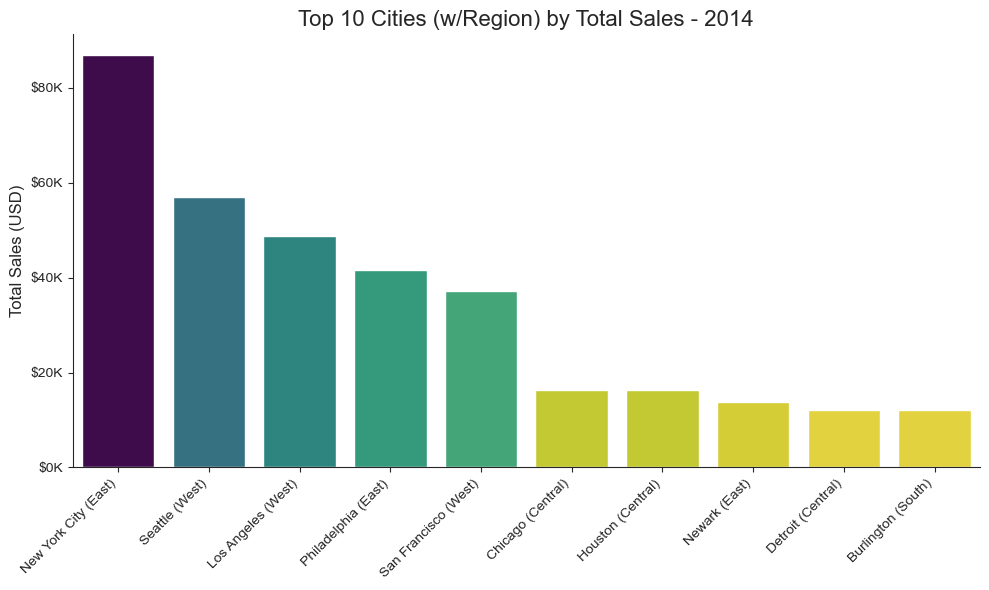

In [4]:
import matplotlib.ticker as mticker

# Extract Year from 'Order Date' and filter for 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014]

# Group by City and Region to get total Sales for 2014
city_sales_2014 = df_2014.groupby(['City', 'Region'])['Sales'].sum().reset_index()

# Sort the cities by total sales in descending order and get the top 10
top_10_cities = city_sales_2014.sort_values(by='Sales', ascending=False).head(10)

# Create a new column: "City (Region)"
top_10_cities['City (Region)'] = top_10_cities['City'] + ' (' + top_10_cities['Region'] + ')'

# Plot the bar chart using the new 'City (Region)' column
plt.figure(figsize=(10, 6))
sns.barplot(
    x='City (Region)', y='Sales', data=top_10_cities, 
    hue='Sales', palette='viridis_r', dodge=False, legend=False
)

# Rotate and align x-axis labels to the left
plt.xticks(rotation=45, ha='right', fontsize=10)

# Format the y-axis
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xlabel('')
plt.title('Top 10 Cities (w/Region) by Total Sales - 2014', fontsize=16)
plt.grid(False)

# Format the y-axis labels in $K
def currency_format(x, _):
    return f'${int(x // 1000)}K'
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Remove borders and set styling
sns.despine()
sns.set_style('ticks')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Chart showing Sales Distribution by Region

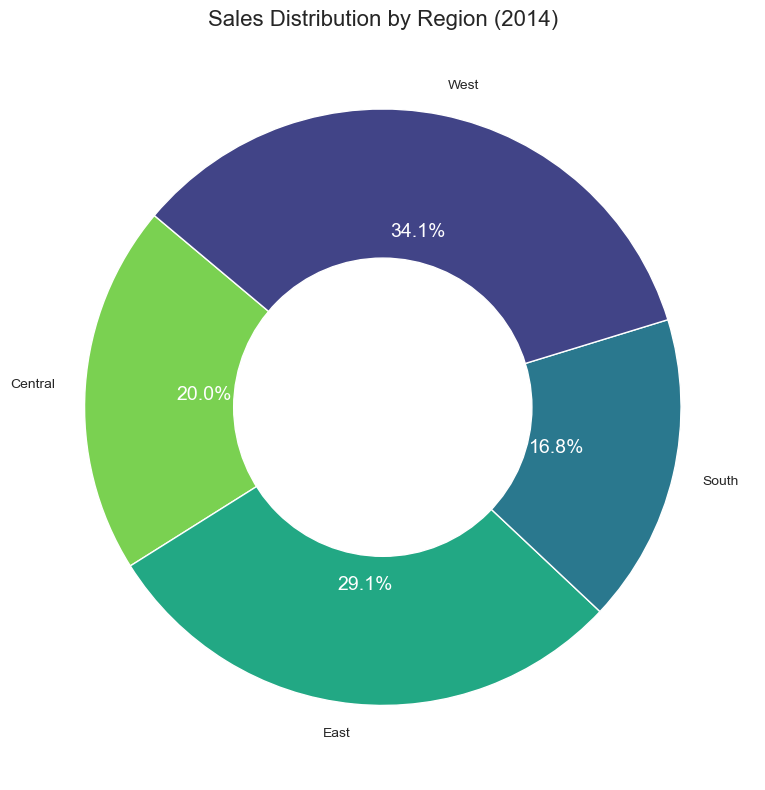

In [7]:
# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014]

# Group by Region and sum the sales
region_sales_2014 = df_2014.groupby('Region')['Sales'].sum().reset_index()

# Create a pie chart and convert it to a donut plot by adding a white circle in the center
plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis_r', len(region_sales_2014))

# Plot the pie chart
wedges, texts, autotexts = plt.pie(
    region_sales_2014['Sales'], 
    labels=region_sales_2014['Region'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Style the percentage labels: white color and larger font
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

# Add a white circle to make it a donut plot
center_circle = plt.Circle((0, 0), 0.50, color='white')
plt.gca().add_artist(center_circle)

# Set title
plt.title('Sales Distribution by Region (2014)', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## How many Orders are Customers typically making?

### Chart Showing Histogram of Orders with the Median.

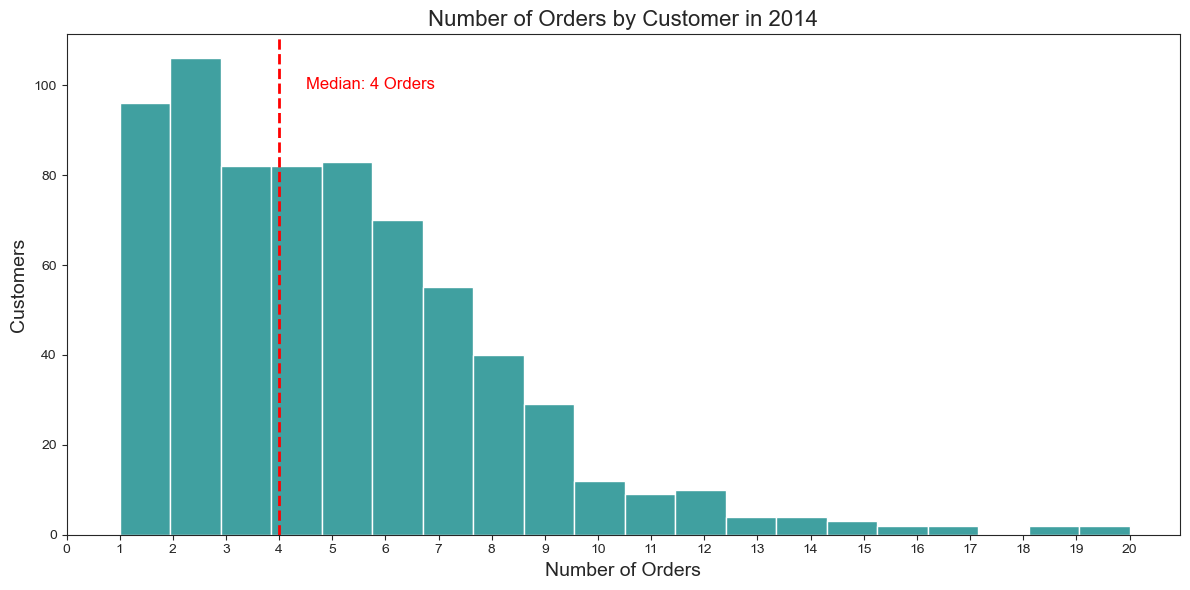

In [6]:
# Extract Year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Filter for the year 2014
df_2014 = df[df['Year'] == 2014]

# Count the number of orders by Customer Name
orders_by_customer = df_2014['Customer Name'].value_counts().reset_index()
orders_by_customer.columns = ['Customer Name', 'Order Count']

# Calculate the median order count
median_order_count = orders_by_customer['Order Count'].median()

# Plot a histogram (bar plot) of the number of orders by customer
plt.figure(figsize=(12, 6))
sns.histplot(orders_by_customer['Order Count'], bins=20, color='teal')

# Add a median line
plt.axvline(median_order_count, color='red', linestyle='--', linewidth=2)

# Label the median line
plt.text(median_order_count + 0.5, plt.gca().get_ylim()[1] * 0.9, 
         f'Median: {int(median_order_count)} Orders', 
         color='red', fontsize=12, ha='left', va='center')

# Add titles and labels
plt.title('Number of Orders by Customer in 2014', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Customers', fontsize=14)

# Set x-ticks to whole numbers
plt.xticks(range(0, int(orders_by_customer['Order Count'].max()) + 1, 1))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Who are the top customers by sales volume and profit?

### Chart showing Top 5 Customers for Sales & Profit (2014)

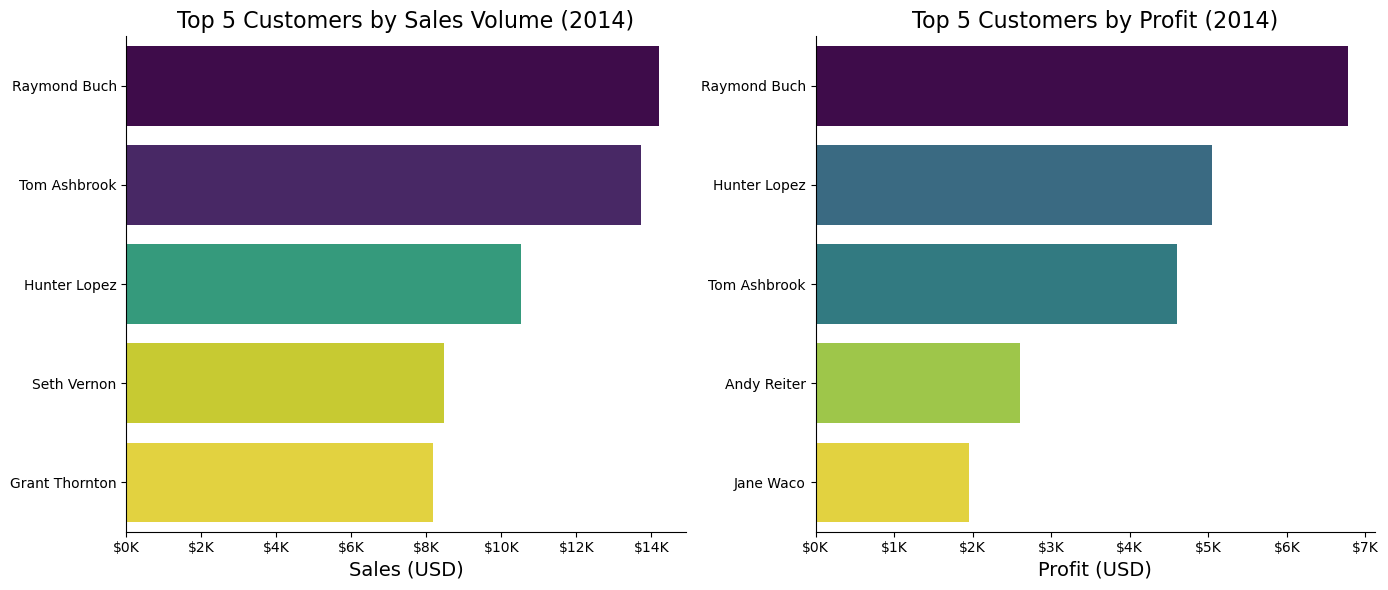

In [3]:
import matplotlib.ticker as mticker

# Extract Year from 'Order Date' and filter for 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014]

# Group by Customer Name to get total Sales and Profit
customer_sales_profit = df_2014.groupby('Customer Name').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Get the top 5 customers by Sales/Profit
top_customers = customer_sales_profit.nlargest(5, 'Sales')
top_customersprofit = customer_sales_profit.nlargest(5, 'Profit')

# Create a figure with subplots for Sales and Profit
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Sales
sns.barplot(x='Sales', y='Customer Name', data=top_customers, ax=axes[0], hue='Sales', palette='viridis_r', legend=False)
axes[0].set_title('Top 5 Customers by Sales Volume (2014)', fontsize=16)
axes[0].set_xlabel('Sales (USD)', fontsize=14)
axes[0].set_ylabel('')

# Format the Sales Labels
def currency_format(x, _):
    return f'${int(x // 1000)}K'
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Plot Profit
sns.barplot(x='Profit', y='Customer Name', data=top_customersprofit, ax=axes[1], palette='viridis_r', hue='Profit', legend=False)
axes[1].set_title('Top 5 Customers by Profit (2014)', fontsize=16)
axes[1].set_xlabel('Profit (USD)', fontsize=14)
axes[1].set_ylabel('')

# Format the Profit Labels
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Adjust layout for better spacing
sns.despine()
plt.tight_layout()
plt.show()